In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy

# Problema 

El precio de un sistema de energía solar es dado por:

$$U=35A +208V$$

dónde $A$ es la superficie del collector y $V$ es el volumen de la bateria que almacena la energía. Debido a consideraciones de balance de energía, se debe considerar que: 

$$A\left(290 - \frac{100}{V}\right) = 5833.3$$

Adicionalmente, el volumen de la batería $V$ está relacionado a la temperatura de operación del sistema $T$, y está configurado tal que:

$$V=\frac{50}{T-20}$$

Los proveedores de batería únicamente proveen modelos que trabajan entre 40 y 90 grados centígrados. Se desea optmizar el costo $U$ considerando todas las limitaciones presentadas.

## Solución

Juntando todas las expresiones y expresando en términos de $T$, tenemos la siguiente ecuación:

$$U=\frac{204165.5}{330 - 2T} + \frac{10400}{T - 20}$$

Puesto que la temperatura $T$ está limitada al rango $[40, 90]$, la función será ploteada en este rango.

In [2]:
def plotPuntos(a,b):
    T = np.linspace(a, b, 100)
    U = (204165.5)/(330 - 2*T) + (10400)/(T - 20)

    return T, U

In [3]:
def GraficarFuncionObjetivo():
    a, b = 40, 90
    T, U = plotPuntos(a, b)
    
    plt.plot(T, U, 'b')
    plt.plot(55.08, 1225.17, 'ko')
    plt.annotate(r'$55.08, 1225.17$', (55.08, 1225.17), (50, 1250))
    
    plt.xlabel('Temperatura')
    plt.ylabel('Costo')
    plt.grid()
    plt.show()

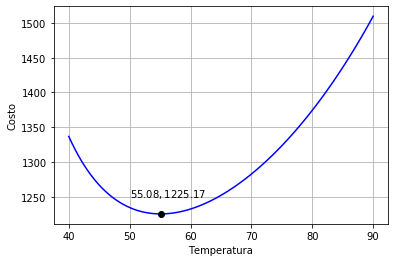

In [4]:
GraficarFuncionObjetivo()

# Cálculo del gradiente

Puesto que en estos métodos se necesita calcular la derivada, se utilizará python para derivar la ecuación: 

$$U=\frac{204165.5}{330 - 2T} + \frac{10400}{T - 20}$$

Entonces la primera y segunda derivada se puede calcular de la siguiente manera:

In [5]:
def CalcularGradiente():
    T = sympy.Symbol('T')
    U = (204165.5)/(330 - 2*T) + (10400)/(T - 20)
    
    d1U = sympy.diff(U)
    d2U = sympy.diff(d1U)
    
    print(U)
    print(d1U)
    print(d2U)

In [6]:
CalcularGradiente()

10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2
20800/(T - 20)**3 + 1633324.0/(330 - 2*T)**3


In [7]:
def U(T):
    return 10400/(T - 20) + 204165.5/(330 - 2*T)

In [8]:
U(55.08)

1225.1656408350887

In [9]:
def d1U(T):
    return -10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2

In [10]:
d1U(55.08)

-0.0022423688924249063

In [11]:
def d2U(T):
    return 20800/(T - 20)**3 + 1633324.0/(330 - 2*T)**3

In [12]:
d2U(55.08)

0.6355474551218123

# Algoritmo del método de Newton Raphson

* **Paso 1:** Definir: $a$, $b$, $x$, y $\epsilon$.
* **Paso 2:** Calcular: $f'(x)$ y $f''(x)$
    * **Almacenar** $x_{prev} = x$
    * **Actualizar** $x=x_{prev}-\frac{f'(x)}{f''(x)}$.
    * **if** $\lvert x-x_{prev}\lvert > \epsilon$.
        * **then** goto Paso 2.
        * **else** goto Paso 3.
* **Paso 3:** Convergió: Imprimir $x$ y $f(x)$.

In [14]:
def NewtonRaphson():
    a, b = 40, 90
    x = 90
    epsilon = 0.001
    
    cont = 0
    registro = []
    
    while True:
        # Calculo de f'(x) y f''(x)
        d1U_x = d1U(x)
        d2U_x = d2U(x)
        
        xprev = x
        x = xprev - d1U_x/d2U_x
        
        U_x = U(x)
        
        cont = cont + 1
        registro.append([cont, x, U_x])
        
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, x, U_x))
        
        if(np.abs(x - xprev) <= epsilon):
            print("----------------------------------------------------------------")
            print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, x, U_x))
            break
        
    return registro

In [15]:
reg = NewtonRaphson()

It: 01 - Temp: 60.5730595536 - Costo: 1233.8795849955
It: 02 - Temp: 54.3709476178 - Costo: 1225.3292441409
It: 03 - Temp: 55.0684488875 - Costo: 1225.1657091464
It: 04 - Temp: 55.0835219881 - Costo: 1225.1656368790
It: 05 - Temp: 55.0835286102 - Costo: 1225.1656368790
----------------------------------------------------------------
It: 05 - Temp: 55.0835286102 - Costo: 1225.1656368790


# Evaluación del método

Vamos a plotear el proceso de evolución que el algoritmo siguió para encontrar el mínimo.

In [16]:
def evaluacion(reg):
    reg = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    fig.suptitle('Analisis de convergencia')
    
    axs[0].axhline(55.08, color='k', linewidth=3, linestyle='--')
    axs[0].plot(reg[:, 0], reg[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])
    
    axs[1].axhline(1225.17, color='k', linewidth=3, linestyle='--')
    axs[1].plot(reg[:, 0], reg[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])
    
    plt.show()

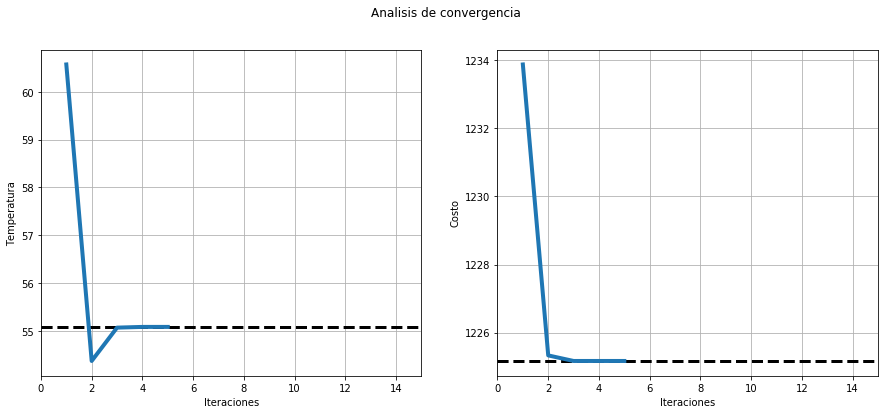

In [17]:
evaluacion(reg)